In [1]:
## data
import pandas as pd
import numpy as np
import datetime as dt
from dateutil.relativedelta import relativedelta

## viz
import matplotlib.pyplot as plt
import seaborn as sns

## model
import statsmodels.api as sm
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")
import matplotlib.dates as mdates

%matplotlib inline

In [2]:
PATH = "../Dados/Armarios/"
FILE = "base_serie_temporal.csv"

In [3]:
df = pd.read_csv(PATH + FILE, sep = '|')
df['mes'] = df['mes'].astype('string')
df['mes'] = df['mes'].apply(lambda x: pd.to_datetime(str(x) + '01'))
df

,mes,macroregiao,uf,consumototal,valortotal,consumopontatotal,consumoforapontatotal,demandaconsumida
0,2017-01-01,CO,DF,197037.00,142995.97,0.0,197037.00,0.0
1,2017-01-01,CO,GO,481709.39,317902.59,0.0,481709.39,0.0
2,2017-01-01,CO,MS,177800.00,120142.91,0.0,177800.00,0.0
3,2017-01-01,CO,MT,123380.00,98882.99,0.0,123380.00,0.0
4,2017-01-01,NE,AL,68556.00,47076.41,0.0,68556.00,0.0
...,...,...,...,...,...,...,...,...
1218,2022-05-01,S,SC,281570.00,233974.63,1331.0,280239.00,0.0
1219,2022-05-01,SE,ES,209734.00,195998.85,2669.0,207065.00,0.0
1220,2022-05-01,SE,MG,364837.00,68521.01,0.0,364837.00,0.0
1221,2022-05-01,SE,RJ,287063.00,245393.67,793.0,286270.00,0.0


In [4]:
df_pb = df.loc[df['uf'] == 'SP']
df_pb

,mes,macroregiao,uf,consumototal,valortotal,consumopontatotal,consumoforapontatotal,demandaconsumida
17,2017-01-01,SE,SP,760709.45,444513.67,0.0,760709.45,0.0
35,2017-02-01,SE,SP,737632.90,428716.05,0.0,737632.90,0.0
53,2017-03-01,SE,SP,867907.00,513006.04,0.0,867907.00,0.0
71,2017-04-01,SE,SP,770133.74,442415.12,0.0,770133.74,0.0
89,2017-05-01,SE,SP,910250.30,504063.16,19824.0,890426.30,0.0
...,...,...,...,...,...,...,...,...
1146,2022-01-01,SE,SP,526623.92,335857.93,368.0,526255.92,0.0
1165,2022-02-01,SE,SP,505013.49,478613.51,0.0,505013.49,0.0
1184,2022-03-01,SE,SP,517381.20,494212.83,944.0,516437.20,0.0
1203,2022-04-01,SE,SP,501224.80,482995.08,0.0,501224.80,0.0


In [5]:
df_pb = df_pb[['mes', 'consumototal']]
df_pb

,mes,consumototal
17,2017-01-01,760709.45
35,2017-02-01,737632.90
53,2017-03-01,867907.00
71,2017-04-01,770133.74
89,2017-05-01,910250.30
...,...,...
1146,2022-01-01,526623.92
1165,2022-02-01,505013.49
1184,2022-03-01,517381.20
1203,2022-04-01,501224.80


In [6]:
df_pb.reset_index(inplace=True)

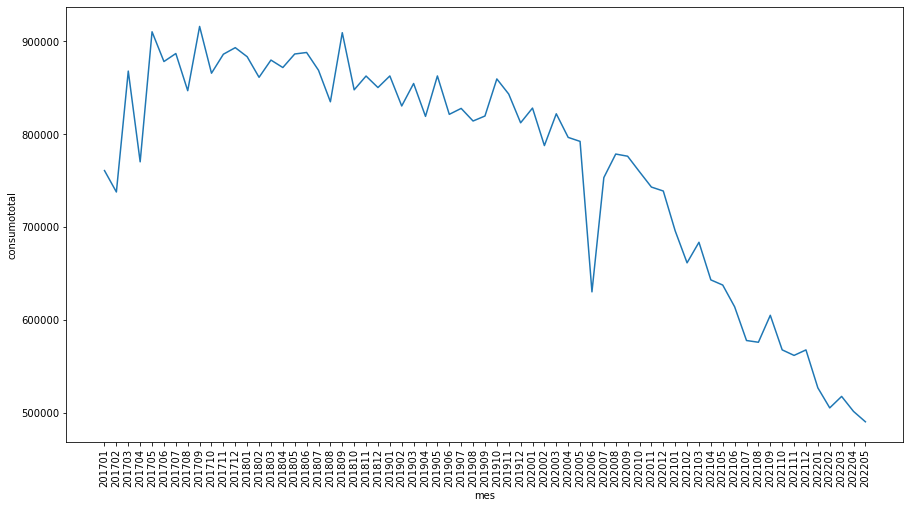

In [7]:
fig = plt.figure(figsize=(15,8))

sns.lineplot(data=df_pb, x=df_pb['mes'].dt.strftime('%Y%m'), y="consumototal")
plt.xticks(rotation=90)
plt.show()

In [8]:
df_plot = df_pb[['mes', 'consumototal']]
df_plot['mm'] = df_plot['consumototal'].rolling(window=6).mean()

df_plot.head(10)

,mes,consumototal,mm
0,2017-01-01,760709.45,NaN
1,2017-02-01,737632.90,NaN
2,2017-03-01,867907.00,NaN
3,2017-04-01,770133.74,NaN
4,2017-05-01,910250.30,NaN
5,2017-06-01,878202.30,820805.948333
6,2017-07-01,886818.40,841824.106667
7,2017-08-01,846780.40,860015.356667
8,2017-09-01,916009.90,868032.506667
9,2017-10-01,865613.00,883945.716667


<AxesSubplot:>

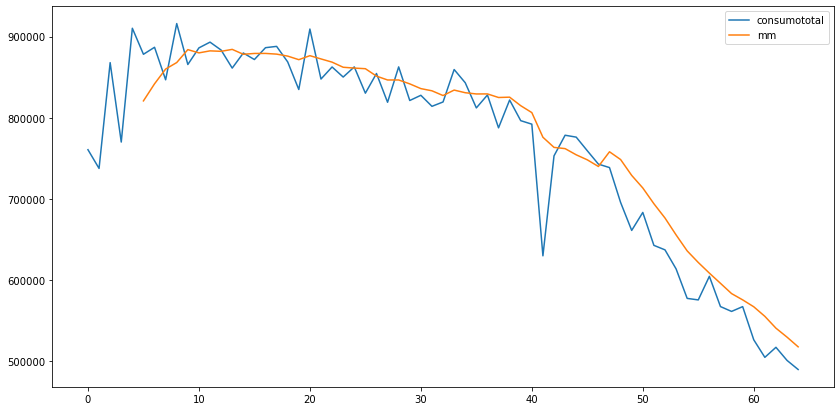

In [9]:
df_plot[['consumototal', 'mm']].plot(figsize=(14, 7))

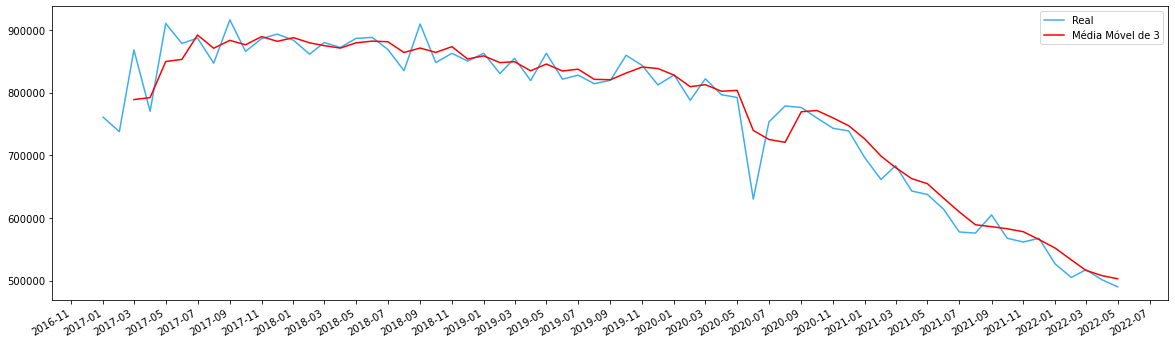

In [10]:
fig = plt.figure(figsize=(20, 6))

x = df_plot['mes']
y = df_plot['consumototal']
mm3 = df_plot['consumototal'].rolling(3).mean()
plt.plot(x, y, label='Real', color='#3CADF2')
plt.plot(x, mm3, label='Média Móvel de 3', color='red')

plt.legend()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.gcf().autofmt_xdate()

In [7]:
df_pb = df_pb[['mes', 'consumototal']]
decompose = df_pb[df_pb['consumototal'] > 0].set_index('mes')
decompose

,consumototal
mes,
2017-01-01,760709.45
2017-02-01,737632.90
2017-03-01,867907.00
2017-04-01,770133.74
2017-05-01,910250.30
...,...
2022-01-01,526623.92
2022-02-01,505013.49
2022-03-01,517381.20


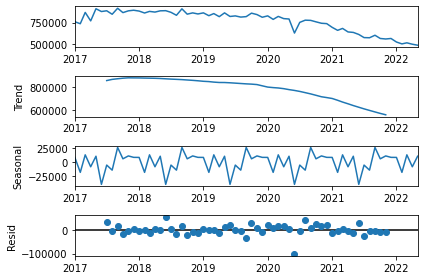

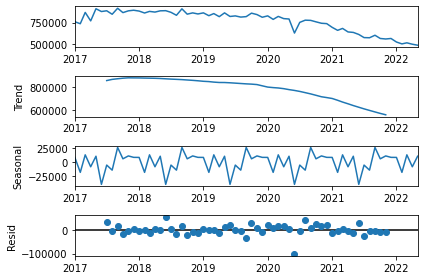

In [14]:
decompose_data = seasonal_decompose(decompose, model="additive")
decompose_data.plot()

<AxesSubplot:xlabel='mes'>

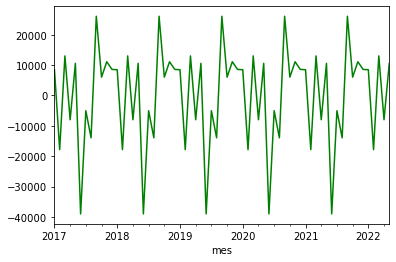

In [15]:
seasonality=decompose_data.seasonal
seasonality.plot(color='green')

In [8]:
dftest = adfuller(decompose, autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  1.4143312652035815
2. P-Value :  0.9971782839202276
3. Num Of Lags :  3
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 61
5. Critical Values :
	 1% :  -3.542412746661615
	 5% :  -2.910236235808284
	 10% :  -2.5927445767266866


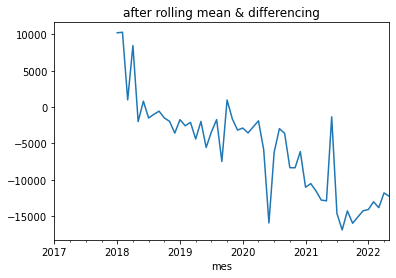

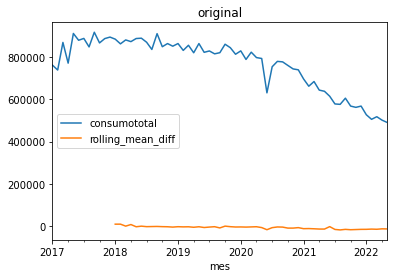

In [10]:
rolling_mean = decompose['consumototal'].rolling(window = 12).mean()
decompose['rolling_mean_diff'] = rolling_mean - rolling_mean.shift()
ax1 = plt.subplot()
decompose['rolling_mean_diff'].plot(title='after rolling mean & differencing');
ax2 = plt.subplot()
decompose.plot(title='original');

In [11]:
dftest = adfuller(decompose['rolling_mean_diff'].dropna(), autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
  print("\t",key, ": ", val)

1. ADF :  0.48378500405296776
2. P-Value :  0.9843718321731638
3. Num Of Lags :  11
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 41
5. Critical Values :
	 1% :  -3.60098336718852
	 5% :  -2.9351348158036012
	 10% :  -2.6059629803688282


In [12]:
temp = pd.DataFrame(pd.date_range(start='2022-06-01', periods=7, freq='M'), columns=['mes'])
temp['mes'] = pd.to_datetime(temp['mes'].dt.strftime('%Y-%m-01'))
temp['consumototal'] = np.nan

df = pd.concat([df_pb, temp]).reset_index(drop=True)
del temp
df

,mes,consumototal
0,2017-01-01,760709.45
1,2017-02-01,737632.90
2,2017-03-01,867907.00
3,2017-04-01,770133.74
4,2017-05-01,910250.30
...,...,...
67,2022-08-01,NaN
68,2022-09-01,NaN
69,2022-10-01,NaN
70,2022-11-01,NaN


In [13]:
dt_train_test = dt.datetime(2022, 1, 1)

xtrain = df[df['mes'] < dt_train_test]
xtest = df.loc[(df['mes'] >= dt_train_test) & (df['mes'] <= dt.datetime(2022, 12, 1))]

In [14]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaler_data = scaler.fit_transform(xtrain['consumototal'].values.reshape(-1, 1))
xtrain['consumototal'] = scaler_data

xtrain.head(3)

,mes,consumototal
0,2017-01-01,0.561851
1,2017-02-01,0.496745
2,2017-03-01,0.864287


In [15]:
print('Train interval: ', xtrain['mes'].min().date(), ' até ', xtrain['mes'].max().date())

Train interval:  2017-01-01  até  2021-12-01


In [16]:
print('Test interval: ', xtest['mes'].min().date(), ' até ', xtest['mes'].max().date())

Test interval:  2022-01-01  até  2022-12-01


In [17]:
interval_start = xtest.index.min()
interval_end = xtest.index.max()

print('Test interval: ', interval_start, ' até ', interval_end)

Test interval:  60  até  71


In [18]:
from statsmodels.tsa.arima_model import ARIMA

In [19]:
from pmdarima.arima import auto_arima

In [23]:
df.set_index('mes', inplace=True)
df

,consumototal
mes,
2017-01-01,760709.45
2017-02-01,737632.90
2017-03-01,867907.00
2017-04-01,770133.74
2017-05-01,910250.30
...,...
2022-08-01,NaN
2022-09-01,NaN
2022-10-01,NaN


In [25]:
df.iloc[:60,:]

,consumototal
mes,
2017-01-01,760709.45
2017-02-01,737632.90
2017-03-01,867907.00
2017-04-01,770133.74
2017-05-01,910250.30
2017-06-01,878202.30
2017-07-01,886818.40
2017-08-01,846780.40
2017-09-01,916009.90


In [26]:
stepwise_model = auto_arima(df.iloc[:60,:], start_p=1, start_q=1,max_p=6, max_q=6, m=12, start_P=0, seasonal=True, d=1, D=1, trace=True, error_action='ignore',
                            suppress_warnings=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1160.996, Time=0.32 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1164.647, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1160.943, Time=0.06 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1162.976, Time=0.08 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1163.805, Time=0.04 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1159.433, Time=0.14 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=0.55 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.42 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1158.405, Time=0.08 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=1160.731, Time=0.04 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=0.67 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.57 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1162.069, Time=0.18 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1160.452, Time=0.49 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : 

In [27]:
print(stepwise_model.aic())

1158.404783393551


In [29]:
stepwise_model = auto_arima(df.iloc[:60,:], start_p=1, start_q=1,max_p=6, max_q=6, m=12, start_P=0, seasonal=True, d=1, D=1, trace=True, error_action='ignore',
                            suppress_warnings=True, stepwise=False)

 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1164.647, Time=0.01 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1164.648, Time=0.05 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=1157.984, Time=0.09 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=1160.731, Time=0.04 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.67 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=1159.219, Time=0.37 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1158.405, Time=0.08 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=0.59 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=inf, Time=0.47 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1169.880, Time=0.03 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1162.976, Time=0.05 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1160.673, Time=0.21 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1165.072, Time=0.07 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=0.34 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=0.49 sec
 ARIMA(0,1,1)(2,1,0)

In [30]:
print(stepwise_model.aic())

1157.984189850116


In [32]:
dt_train_test = dt.datetime(2022, 1, 1)

xtrain = df[df.index < dt_train_test]
xtest = df.loc[(df.index >= dt_train_test) & (df.index <= dt.datetime(2022, 12, 1))]

In [33]:
stepwise_model.fit(xtrain)

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(0, 1, 2, 12),
      suppress_warnings=True, with_intercept=False)

In [34]:
future_forecast = stepwise_model.predict(n_periods=12)

In [36]:
future_forecast = pd.DataFrame(future_forecast,index = xtest.index,columns=["consumo"])

<AxesSubplot:xlabel='mes'>

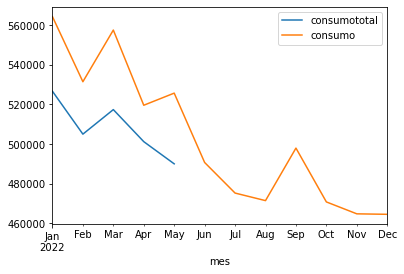

In [38]:
pd.concat([xtest,future_forecast],axis=1).plot()

<AxesSubplot:xlabel='mes'>

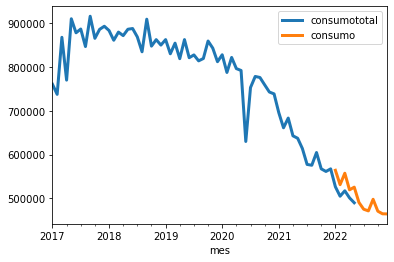

In [39]:
pd.concat([df,future_forecast],axis=1).plot(linewidth=3)

In [40]:
model = sm.tsa.statespace.SARIMAX(xtrain['consumototal'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()

In [41]:
xtest['pred'] = model_fit.predict(start=interval_start, end=interval_end, dynamic=True)

In [42]:
scaler_data = scaler.inverse_transform(xtest['pred'].values.reshape(-1, 1))
xtest['pred'] = scaler_data

In [43]:
xtest

,mes,consumototal,pred
60,2022-01-01,526623.92,540838.079167
61,2022-02-01,505013.49,506433.792960
62,2022-03-01,517381.20,533900.113560
63,2022-04-01,501224.80,498564.840776
64,2022-05-01,490040.60,501719.610335
65,2022-06-01,NaN,437088.505724
66,2022-07-01,NaN,452784.916956
67,2022-08-01,NaN,455704.818797
68,2022-09-01,NaN,475650.642465
69,2022-10-01,NaN,451163.989506


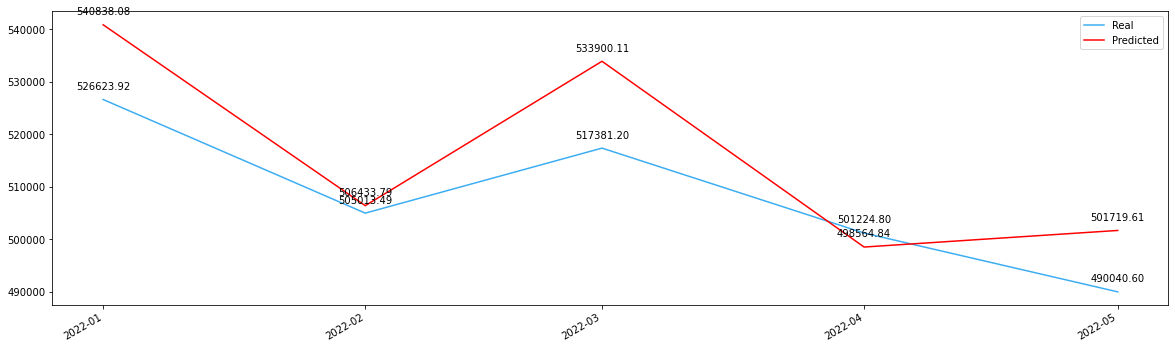

In [44]:
fig = plt.figure(figsize=(20, 6))

x = xtest[~xtest['consumototal'].isna()]['mes']
y = xtest[~xtest['consumototal'].isna()]['consumototal']
p = xtest[~xtest['consumototal'].isna()]['pred']
plt.plot(x, y, label='Real', color='#3CADF2')
plt.plot(x, p, label='Predicted', color='red')

for a, b in zip(x, y):
    plt.annotate("{:.2f}".format(b), (a, b), textcoords="offset points", xytext=(0,10), ha='center')

for a, b in zip(x, p):
    plt.annotate("{:.2f}".format(b), (a, b), textcoords="offset points", xytext=(0,10), ha='center')

plt.legend()
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gcf().autofmt_xdate()

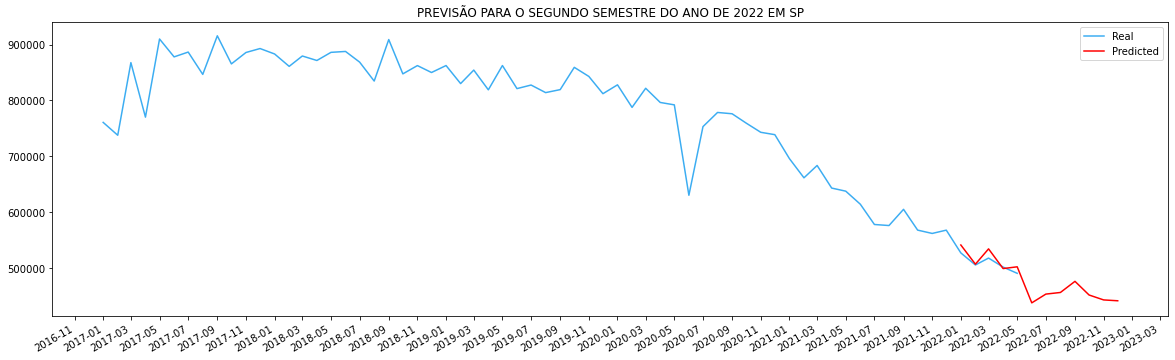

In [50]:
fig = plt.figure(figsize=(20, 6))

df_final = pd.concat([df[:interval_start], xtest])

x = df_final['mes'].dt.date
_real = df_final['consumototal']
_pred = df_final['pred']

plt.plot(x, _real, label='Real', color='#3CADF2')
plt.plot(x, _pred, label='Predicted', color='red')
plt.legend()
plt.title("PREVISÃO PARA O SEGUNDO SEMESTRE DO ANO DE 2022 EM SP")

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.gcf().autofmt_xdate()

Text(0.5, 1.0, 'Forecast de Faturamento do Controle - NEXT')

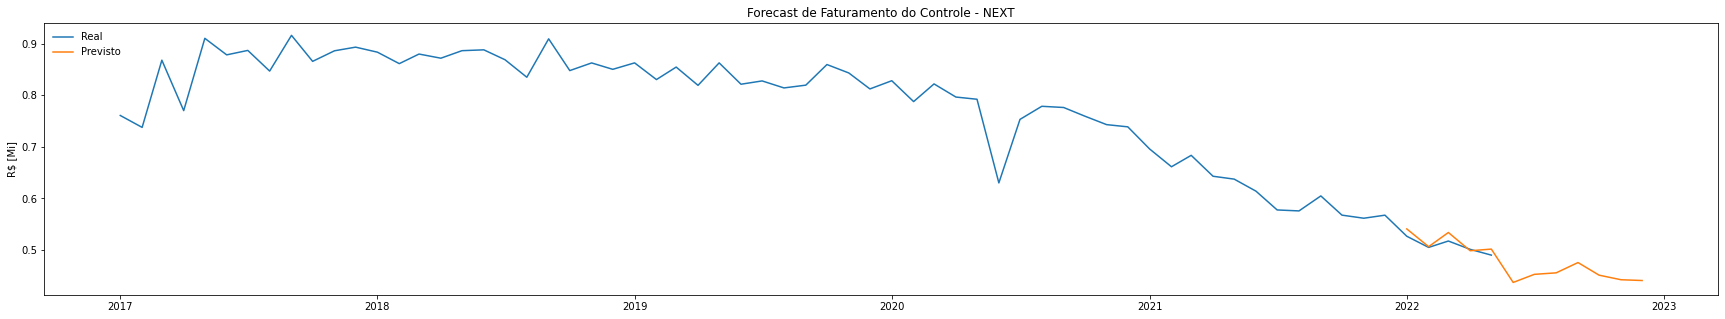

In [46]:
plt.figure(figsize=(30, 5))

ax = sns.lineplot(x=df_final['mes'], y=df_final.consumototal.div(1e6), label="Real")
ax = sns.lineplot(x=df_final['mes'], y=df_final.pred.div(1e6), label="Previsto")

plt.legend()
leg = plt.legend(loc = 2, ncol = 1, shadow = False, fancybox = False, frameon = False, numpoints = 1)
leg.get_frame().set_alpha(0.5)

plt.xlabel("")
plt.ylabel("R$ [Mi]")
#plt.ylim([50,400])
plt.title("Forecast de Faturamento do Controle - NEXT")

In [47]:
y_true = xtest[~xtest['consumototal'].isna()]['consumototal'].values
y_pred = xtest[~xtest['consumototal'].isna()]['pred'].values

In [48]:
# Mean Absolute Percentage Error & Root Mean Square Error
_mape = np.mean(np.abs((y_true - y_pred) / y_true )) * 100
_rmse = np.sqrt(mean_squared_error(y_true, y_pred))

print('MAPE: {:.2f}, MSE: {:.2f}'.format(_mape, _rmse))

MAPE: 1.82, MSE: 11139.20


In [49]:
_rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print('MSE: {:.2f}Mil'.format(_rmse/1E3))

MSE: 11.14Mil
